# **British Airways Customer Review Sentiment Analysis**

<img src="https://www.thetimes.co.uk/imageserver/image/%2Fmethode%2Fsundaytimes%2Fprod%2Fweb%2Fbin%2Fdc193290-c9fe-11eb-b1a7-b60fa06107f0.jpg?crop=1450%2C816%2C67%2C103&resize=1200">

In this notebook, I will be presenting my findings and the process I followed to acquire the data for sentiment analysis. The aim is to gain insights into British Airways' customer satisfaction through the website <a href="https://www.airlinequality.com">Skytrax.</a>

Some of the reasons why getting sentiment analysis is crucial for BA's decision making:
- To know and provide what the customer wants and response to their services.
- To gather insights on which facilities they can improve or change.
- To know if the customer satisfaction is adequate to the services they provide.


## Importing Packages

In [1]:
!pip install requests
!pip install pandas
!pip install nltk
!pip install collections
!pip install re

import requests
from bs4 import BeautifulSoup
import pandas as pd
import os 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aronn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aronn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\aronn\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Gathering the data for the Dataset
This part utilized web scraping to gather data for the dataset.

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

reviews
0  Not Verified | Top Ten REASONS to not use Brit...
1  Not Verified |  Easy check in on the way to He...
2  ✅ Trip Verified |  Online check in worked fine...
3  ✅ Trip Verified |. The BA first lounge at Term...
4  Not Verified | Paid a quick visit to Nice yest...

## Loading the Dataset
After converting the scraped data gathered from the web to a csv file for a proper format for a more understandable preprocessing.

In [4]:
df.to_csv("BA_reviews.csv")
df = pd.read_csv('BA_reviews.csv')
df.head()

Unnamed: 0                                            reviews
0           0  Not Verified | Top Ten REASONS to not use Brit...
1           1  Not Verified |  Easy check in on the way to He...
2           2  ✅ Trip Verified |  Online check in worked fine...
3           3  ✅ Trip Verified |. The BA first lounge at Term...
4           4  Not Verified | Paid a quick visit to Nice yest...

In [5]:
df.shape

(1000, 2)

## Pre-processing of CSV file  data to TXT file data
loaded the saved comments from CSV, converted it to a list, looped through the list, and saved each comment in a TXT file.

In [6]:
# save reviews to a text file
reviews = df["reviews"].values.tolist()

# Write the reviews to a text file
with open("rawdata.txt", "w", encoding='utf-8') as f:
  for review in reviews:
    f.write(review + "\n")

In [7]:
text = open('rawdata.txt', 'r', encoding='utf-8')
data = text.read()
print(data)

Not Verified | Top Ten REASONS to not use British Airways To all: Be Aware and be on Notice- Travel at your own risk I have travelled for years on many different airlines, and I have to say that British Airways ranks as one of the top two most horrible airlines to fly. Don’t waste your time or money. Customer service is non-existent. Please be on notice that if you purchase a ticket from them and once, they have your money, you can kiss any customer service and or help resolving your issue goodbye. We used them to travel to Europe and it was the worst experience I have had with an airline in years. When you work hard and save your money to travel, you expect a good experience. Welp not with this company. Who I am sure, makes millions on customers per year. I understand that sometimes things happen, but this started right after we booked our flight AND THE BAD EXPERIENCE DID NOT END UNTIL WE SET FOOT BACK TO OUR HOMETOWN. Please take note: #1 - The customer service number is buried on t

In [8]:
ensw = stopwords.words('english')
print(ensw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data Preprocessing
The collected data is cleaned by removing irrelevant characters, stopwords, and special symbols.

In [9]:
textArray = word_tokenize(data.lower())     

In [10]:
filterArray = [word for word in textArray if word not in ensw]

In [11]:
print(filterArray)

['verified', '|', 'top', 'ten', 'reasons', 'use', 'british', 'airways', ':', 'aware', 'notice-', 'travel', 'risk', 'travelled', 'years', 'many', 'different', 'airlines', ',', 'say', 'british', 'airways', 'ranks', 'one', 'top', 'two', 'horrible', 'airlines', 'fly', '.', '’', 'waste', 'time', 'money', '.', 'customer', 'service', 'non-existent', '.', 'please', 'notice', 'purchase', 'ticket', ',', 'money', ',', 'kiss', 'customer', 'service', 'help', 'resolving', 'issue', 'goodbye', '.', 'used', 'travel', 'europe', 'worst', 'experience', 'airline', 'years', '.', 'work', 'hard', 'save', 'money', 'travel', ',', 'expect', 'good', 'experience', '.', 'welp', 'company', '.', 'sure', ',', 'makes', 'millions', 'customers', 'per', 'year', '.', 'understand', 'sometimes', 'things', 'happen', ',', 'started', 'right', 'booked', 'flight', 'bad', 'experience', 'end', 'set', 'foot', 'back', 'hometown', '.', 'please', 'take', 'note', ':', '#', '1', '-', 'customer', 'service', 'number', 'buried', 'internet',

In [12]:
stringFilter = ' '.join(filterArray)

In [13]:
print(stringFilter)

verified | top ten reasons use british airways : aware notice- travel risk travelled years many different airlines , say british airways ranks one top two horrible airlines fly . ’ waste time money . customer service non-existent . please notice purchase ticket , money , kiss customer service help resolving issue goodbye . used travel europe worst experience airline years . work hard save money travel , expect good experience . welp company . sure , makes millions customers per year . understand sometimes things happen , started right booked flight bad experience end set foot back hometown . please take note : # 1 - customer service number buried internet listed website . google still got run around someone finally answered . trust , number secret . # 2 – finally find customer service number , long wait someone answers , resolve issues . instead , pass buck whatever airlines sold ticket . one takes ownership # 4- airlines operates 365 days year around clock ’ customer service reps help

In [14]:
words = set(nltk.corpus.words.words())

In [15]:
stringString = re.sub('\W+','\n', stringFilter )

In [16]:
f = open("newList.txt", "w", encoding='utf-8')
f.write(stringString)
f.close()

In [17]:
with open('newList.txt', 'r', encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    f = open('finalList.txt', 'w')
    while line:
        data = line.strip()
        if data in words:
            data = re.sub(r'\b\w{1,2}\b', '\n', data)
            f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [18]:
finalText = open('finalList.txt', 'r')
finalData = finalText.read()

tokenwords = word_tokenize(finalData)
countwords = Counter(tokenwords)

In [19]:
countList = list(Counter((countwords).items()))
newList = '\n'.join([str(i) for i in countList])

In [35]:
# remove tuples with single character
newList = re.sub(r'\b\w\b', '', newList)

In [36]:
print(newList)

('top', 43)
('ten', )
('use', 91)
('aware', 10)
('notice', 12)
('travel', 133)
('risk', 11)
('travelled', 27)
('many', 92)
('different', 77)
('say', 74)
('one', 415)
('two', 167)
('horrible', 21)
('fly', 184)
('waste', 19)
('time', 483)
('money', 99)
('customer', 253)
('service', 722)
('non', 41)
('existent', 12)
('please', 14)
('purchase', 16)
('ticket', 92)
('kiss', )
('help', 108)
('issue', 58)
('used', 90)
('worst', 73)
('experience', 229)
('work', 75)
('hard', 46)
('save', )
('expect', 41)
('good', 435)
('company', 46)
('sure', 50)
('millions', )
('per', 18)
('year', 54)
('understand', 35)
('sometimes', )
('happen', 11)
('right', 36)
('booked', 175)
('flight', 1776)
('bad', 93)
('end', 44)
('set', 14)
('foot', 11)
('back', 268)
('take', 135)
('note', 12)
('number', 88)
('buried', )
('listed', )
('still', 158)
('got', 178)
('run', 32)
('around', 78)
('someone', 55)
('finally', 73)
('trust', )
('secret', )
('find', 97)
('long', 138)
('wait', 74)
('resolve', 11)
('instead', 37)
('pas

## Feature Extraction
Text features such as word frequency and term frequency-inverse document frequency (TF-IDF) are extracted from the preprocessed data.

In [22]:
finalData = re.sub("[)!@#$(]", "", newList)
f = open("Frequency.csv", "w")
f.write(finalData)
f.close()

In [23]:
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

In [24]:
Ptext = open('positive.txt', 'r')
positive = Ptext.read()

Ntext = open('negative.txt', encoding='ISO-8859-1')
negative = Ntext.read()

In [25]:
with open('finalList.txt') as fp:
    line = fp.readline()
    cnt = 1
    f = open('positiveList.txt', 'w')
    while line:
        data = line.strip()
        if data in positive:
            data = re.sub(r'\b\w{1,2}\b', '\n', data)
            f.write(data + '\n')
            # print(data)
        line = fp.readline()
        cnt += 1

In [26]:
PLtext = open('positiveList.txt', 'r')
positiveList = PLtext.read()
positive = re.sub(r'\b\w{1,2}\b', '\n', positiveList)

textArray = word_tokenize(positiveList.lower())
filterArray = [item for item in textArray if item not in negative]

stringFilter = '\n'.join(filterArray)
stringFilter = Counter(filterArray)

print(stringFilter)

Counter({'trip': 923, 'service': 729, 'good': 443, 'first': 259, 'new': 208, 'made': 154, 'great': 150, 'took': 139, 'given': 136, 'better': 133, 'nice': 132, 'refund': 130, 'world': 116, 'excellent': 99, 'room': 81, 'around': 79, 'going': 79, 'enough': 79, 'received': 72, 'quick': 60, 'early': 59, 'felt': 59, 'pretty': 58, 'give': 52, 'working': 48, 'whole': 44, 'smooth': 43, 'looking': 43, 'plus': 42, 'provide': 37, 'fare': 37, 'worked': 36, 'hold': 36, 'keep': 36, 'taking': 35, 'amazing': 34, 'tiny': 33, 'recommend': 33, 'together': 33, 'forward': 33, 'might': 31, 'large': 30, 'clearly': 30, 'open': 30, 'ended': 28, 'future': 28, 'upgrade': 28, 'fantastic': 28, 'lovely': 26, 'except': 25, 'receive': 25, 'outstanding': 24, 'complimentary': 22, 'wonderful': 22, 'amount': 21, 'gold': 21, 'advance': 21, 'original': 20, 'positive': 18, 'send': 18, 'accept': 17, 'spacious': 17, 'improvement': 17, 'fresh': 16, 'ready': 16, 'idea': 16, 'properly': 16, 'enjoyable': 15, 'moment': 15, 'incredi

In [27]:
tokenwords = word_tokenize(positiveList)
countList = list(Counter(tokenwords).items())
newPositiveList = '\n'.join([str(i) for i in countList])

In [28]:
print(newPositiveList)

('top', 43)
('ten', 9)
('use', 94)
('risk', 11)
('one', 419)
('two', 167)
('time', 487)
('service', 729)
('non', 41)
('please', 14)
('help', 109)
('issue', 58)
('work', 78)
('hard', 46)
('save', 9)
('expect', 42)
('good', 443)
('sure', 50)
('per', 18)
('understand', 35)
('right', 36)
('end', 45)
('set', 14)
('back', 268)
('take', 138)
('note', 12)
('run', 32)
('around', 79)
('trust', 8)
('long', 140)
('pass', 33)
('get', 347)
('even', 222)
('refund', 130)
('play', 2)
('done', 59)
('leg', 102)
('person', 47)
('easy', 42)
('way', 126)
('early', 59)
('put', 70)
('cost', 88)
('thank', 41)
('trip', 923)
('worked', 36)
('fine', 73)
('quick', 60)
('cheap', 21)
('efficient', 63)
('first', 259)
('late', 138)
('low', 50)
('class', 416)
('thin', 8)
('allow', 23)
('courteous', 8)
('provide', 37)
('whole', 44)
('expensive', 37)
('thought', 45)
('better', 133)
('fall', 2)
('well', 175)
('full', 150)
('nice', 132)
('since', 89)
('last', 130)
('real', 27)
('round', 22)
('look', 36)
('appealing', 3)
('

In [29]:
with open('finalList.txt') as fp:
    line = fp.readline()
    cnt = 1
    f = open('negativeList.txt', 'w')
    while line:
        data = line.strip()
        if data in negative:
            # print(data)
            data = re.sub(r'\b\w{1,2}\b', '\n', data)
            f.write(data + '\n')
        line = fp.readline()
        cnt += 1

In [30]:
NLtext = open('negativeList.txt', 'r')
NegativeList = NLtext.read()
NegativeList = re.sub(r'\b\w{1,2}\b', '\n', NegativeList)


textArray = word_tokenize(NegativeList.lower())
filterArray = [item for item in textArray if item not in positive]

stringFilter = '\n'.join(filterArray)
stringFilter = Counter(filterArray)

print(stringFilter)

Counter({'flight': 1785, 'seat': 519, 'crew': 476, 'check': 350, 'experience': 230, 'got': 178, 'due': 169, 'bag': 164, 'still': 159, 'day': 157, 'next': 138, 'water': 125, 'gate': 125, 'make': 125, 'pay': 123, 'poor': 121, 'left': 110, 'small': 104, 'bad': 94, 'later': 93, 'used': 90, 'short': 89, 'change': 82, 'screen': 82, 'delay': 80, 'different': 77, 'front': 77, 'security': 76, 'little': 75, 'say': 74, 'came': 74, 'worst': 73, 'half': 66, 'lost': 66, 'want': 64, 'away': 60, 'need': 60, 'three': 59, 'uncomfortable': 57, 'seating': 56, 'terrible': 55, 'see': 55, 'second': 54, 'usual': 53, 'try': 53, 'point': 49, 'sent': 49, 'let': 48, 'ask': 47, 'total': 46, 'kept': 46, 'night': 46, 'avoid': 44, 'lot': 44, 'big': 44, 'standard': 42, 'lack': 42, 'onto': 40, 'yet': 40, 'decided': 40, 'ago': 40, 'busy': 40, 'may': 39, 'course': 39, 'unfortunately': 38, 'cold': 37, 'tray': 37, 'feel': 37, 'lady': 37, 'cramped': 36, 'disappointed': 36, 'complaint': 35, 'speak': 35, 'slow': 35, 'appallin

In [31]:
tokenwords = word_tokenize(NegativeList)
countList = list(Counter(tokenwords).items())
newNegativeList = '\n'.join([str(i) for i in countList])

In [32]:
finalNegative = re.sub("[)!@#$(]", "", newNegativeList)
finalPositive = re.sub("[)!@#$(]", "", newPositiveList)

In [33]:
p = open('positiveData.csv', 'w')
n = open('negativeData.csv', 'w')

p.write(finalPositive)
n.write(finalNegative)

p.close()
n.close()


In [37]:
!pip install textblob
from textblob import TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

                                              0.0/636.8 kB ? eta -:--:--
     ------------------------------------- 636.8/636.8 kB 13.6 MB/s eta 0:00:00
                                              0.0/126.0 kB ? eta -:--:--
     -------------------------------------- 126.0/126.0 kB 7.2 MB/s eta 0:00:00


In [38]:
text = open('rawdata.txt', 'r', encoding='utf-8')
data = text.read()

In [39]:
analyzer = SentimentIntensityAnalyzer()

In [40]:
count = list(analyzer.polarity_scores(data).items())
vs = '\n'.join([str(i) for i in count])

csvFileFormat = re.sub("[)!@#$(]", "", vs)
print(csvFileFormat)

'neg', 0.085
'neu', 0.804
'pos', 0.112
'compound', 1.0


## Sentiment Analysis
Machine learning algorithms are applied to classify comments as positive, negative, or neutral based on the extracted features.

In [41]:
f = open('Polarity.csv', 'w')
f.write('Polarity,Value\n')
f.write(csvFileFormat)
f.close()

In [42]:
filepath = 'rawdata.txt'
with open(filepath, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('polarityList.txt', 'w')
    while line:
        data = line.strip()
        countlist = list(analyzer.polarity_scores(data).items())
        vs = ":".join([str(i) for i in countlist])
        fa.write(vs + '\n')
        print(vs)
        line = fp.readline()
        cnt += 1

('neg', 0.09):('neu', 0.827):('pos', 0.083):('compound', -0.7984)
('neg', 0.086):('neu', 0.89):('pos', 0.024):('compound', -0.6711)
('neg', 0.0):('neu', 0.753):('pos', 0.247):('compound', 0.8479)
('neg', 0.091):('neu', 0.842):('pos', 0.066):('compound', -0.1289)
('neg', 0.055):('neu', 0.822):('pos', 0.123):('compound', 0.9738)
('neg', 0.174):('neu', 0.775):('pos', 0.051):('compound', -0.9746)
('neg', 0.141):('neu', 0.85):('pos', 0.009):('compound', -0.9649)
('neg', 0.157):('neu', 0.767):('pos', 0.076):('compound', -0.789)
('neg', 0.0):('neu', 1.0):('pos', 0.0):('compound', 0.0)
('neg', 0.0):('neu', 0.0):('pos', 0.0):('compound', 0.0)
('neg', 0.076):('neu', 0.9):('pos', 0.024):('compound', -0.6334)
('neg', 0.038):('neu', 0.816):('pos', 0.146):('compound', 0.8898)
('neg', 0.079):('neu', 0.801):('pos', 0.12):('compound', 0.8782)
('neg', 0.082):('neu', 0.897):('pos', 0.02):('compound', -0.7894)
('neg', 0.104):('neu', 0.88):('pos', 0.016):('compound', -0.981)
('neg', 0.094):('neu', 0.876):(

In [43]:
text = open('polarityList.txt', 'r')
polarity = text.read()
Format = re.sub("[)!@''#$(pos,neu,neg,compound]", '', polarity)
csvFileFormat = re.sub(':',',', Format)
print('Negative, Neutral, Positive, Compound')
print(csvFileFormat)

Negative, Neutral, Positive, Compound
 0.09, 0.827, 0.083, -0.7984
 0.086, 0.89, 0.024, -0.6711
 0.0, 0.753, 0.247, 0.8479
 0.091, 0.842, 0.066, -0.1289
 0.055, 0.822, 0.123, 0.9738
 0.174, 0.775, 0.051, -0.9746
 0.141, 0.85, 0.009, -0.9649
 0.157, 0.767, 0.076, -0.789
 0.0, 1.0, 0.0, 0.0
 0.0, 0.0, 0.0, 0.0
 0.076, 0.9, 0.024, -0.6334
 0.038, 0.816, 0.146, 0.8898
 0.079, 0.801, 0.12, 0.8782
 0.082, 0.897, 0.02, -0.7894
 0.104, 0.88, 0.016, -0.981
 0.094, 0.876, 0.03, -0.5719
 0.153, 0.847, 0.0, -0.8519
 0.115, 0.805, 0.08, -0.2382
 0.098, 0.827, 0.075, -0.7786
 0.064, 0.911, 0.025, -0.9455
 0.104, 0.864, 0.032, -0.7881
 0.089, 0.877, 0.033, -0.789
 0.138, 0.862, 0.0, -0.8537
 0.069, 0.707, 0.225, 0.9601
 0.09, 0.874, 0.036, -0.8055
 0.091, 0.782, 0.127, 0.1015
 0.142, 0.812, 0.046, -0.96
 0.127, 0.788, 0.085, -0.851
 0.05, 0.86, 0.09, 0.9251
 0.101, 0.871, 0.028, -0.9372
 0.041, 0.952, 0.006, -0.7428
 0.294, 0.706, 0.0, -0.9392
 0.107, 0.835, 0.058, -0.5681
 0.163, 0.782, 0.056, -0.89

In [44]:
f = open('Polarity.csv', 'w')
f.write("Negative,Neutral,Positive,Compound\n")
f.write(csvFileFormat)
f.close()

In [45]:
analysis = TextBlob(data)
List = list(analysis.sentiment)
newList = ','.join([str(i) for i in List])
print('Polarity,Subjectivity')
print(newList)

Polarity,Subjectivity
0.21202380952380948,0.47630952380952385


In [46]:
f = open('Sentiment.csv', 'w')
f.write('Popularity,Subjectivity\n')
f.write(newList)
f.close()

In [47]:
filepath = 'rawdata.txt'
with open(filepath, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('SentimentList.csv', 'w')
    print('Polarity,Subjectivity')
    fa.write('Polarity,Subjectivity\n')
    while line:
        data = line.strip()
        analysis = TextBlob(data)
        countList = list(analysis.sentiment)
        
        vs = ','.join([str(i) for i in countList])
        fa.write(vs + '\n')
        print(vs)
        line = fp.readline()
        cnt+=1

Polarity,Subjectivity
0.04720853858784895,0.533032293377121
0.09666666666666668,0.3066666666666667
0.41111111111111115,0.6166666666666667
-0.08971193415637856,0.49985302763080547
0.20946969696969697,0.45098484848484843
-0.22796378968253966,0.5632837301587301
-0.23392857142857137,0.47619047619047616
-0.2708333333333333,0.5402777777777777
0.0,0.0
0.0,0.0
0.0062500000000000056,0.19375
0.03582251082251083,0.45740259740259737
0.1446819384319384,0.5522246272246272
0.07129629629629629,0.442283950617284
-0.05950980392156863,0.41000000000000003
-0.45,0.525
0.004999999999999993,0.5826923076923077
0.03863636363636363,0.36666666666666664
-0.031276595744680856,0.6049290780141844
-0.07166666666666667,0.36416666666666664
-0.10437500000000002,0.35333333333333333
-0.0033333333333333457,0.6333333333333333
-0.21666666666666665,0.26666666666666666
0.3881060606060606,0.6227272727272727
-0.11958333333333333,0.48083333333333333
0.15,0.5666666666666667
-0.06232142857142858,0.557797619047619
-0.002232142857142

In [50]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

                                              0.0/153.3 kB ? eta -:--:--
     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00
                                              0.0/2.5 MB ? eta -:--:--
     --------------------------               1.7/2.5 MB 36.2 MB/s eta 0:00:01
     ---------------------------------------- 2.5/2.5 MB 32.4 MB/s eta 0:00:00
                                              0.0/7.6 MB ? eta -:--:--
     --------                                 1.6/7.6 MB 34.2 MB/s eta 0:00:01
     -----------------                        3.4/7.6 MB 36.1 MB/s eta 0:00:01
     ---------------------------              5.3/7.6 MB 37.8 MB/s eta 0:00:01
     --------------------------------------   7.4/7.6 MB 39.4 MB/s eta 0:00:01
     ---------------------------------------  7.6/7.6 MB 40.5 MB/s eta 0:00:01
     ---------------------------------------- 7.6/7.6 MB 30.5 MB/s eta 0:00:00
                                              0.0/160.2 kB ? eta -:--:--


In [51]:
text = open('finalList.txt', 'r')
data = text.read()

## Total Response WordCloud
This word cloud represents the most frequently occurring words in the overall response, with the size of each word indicating its frequency of occurrence. The larger the word, the more times it appears in the data.

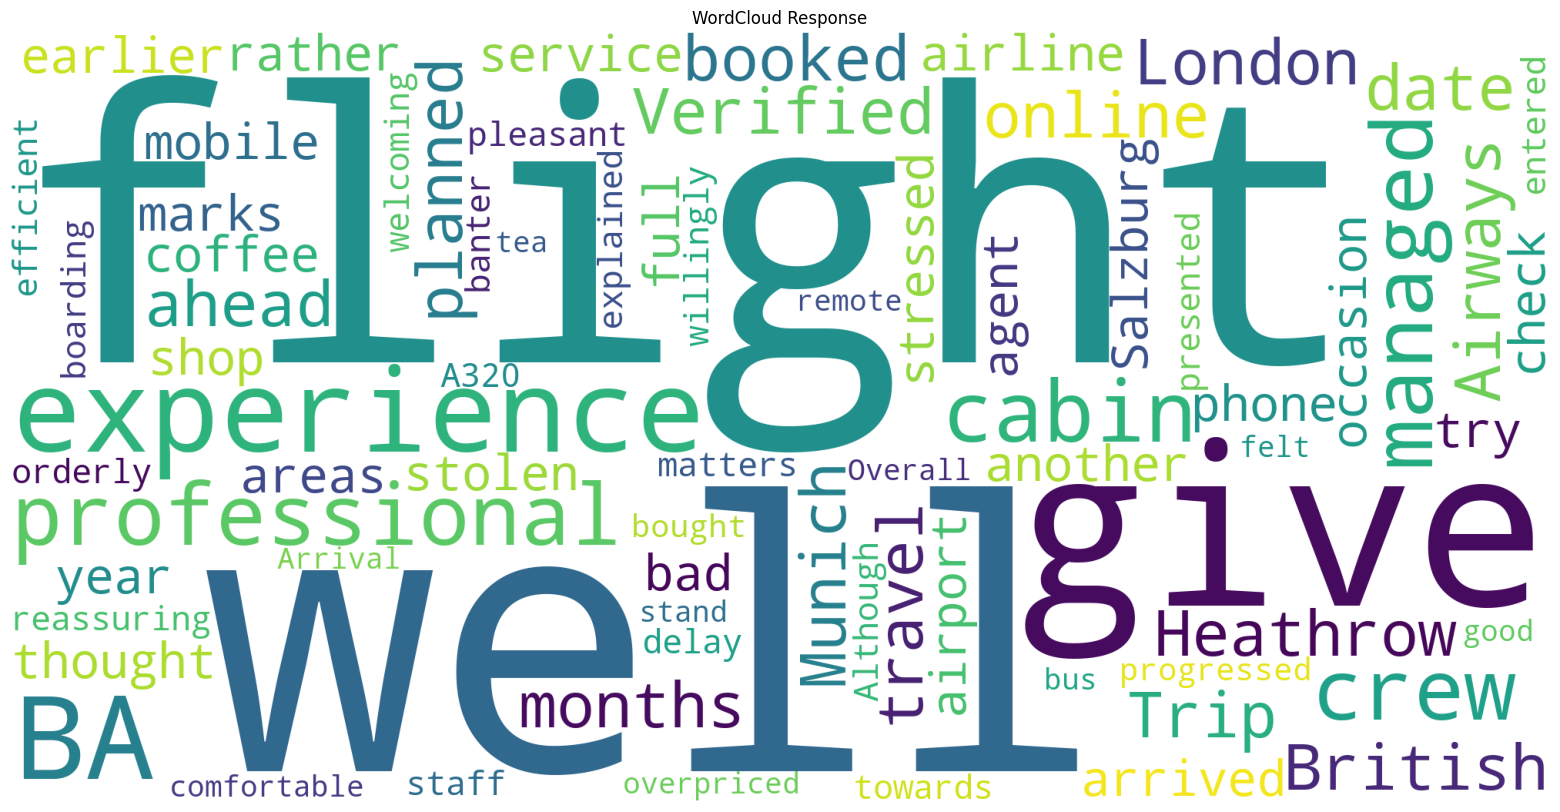

In [69]:
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(mode='RGB', background_color="white", width=2000, height=1000).generate(data)
plt.title('WordCloud Response')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Positive Response WordCloud
This word cloud represents the most positive occurring words in the overall response, with the size of each word indicating its frequency of occurrence.

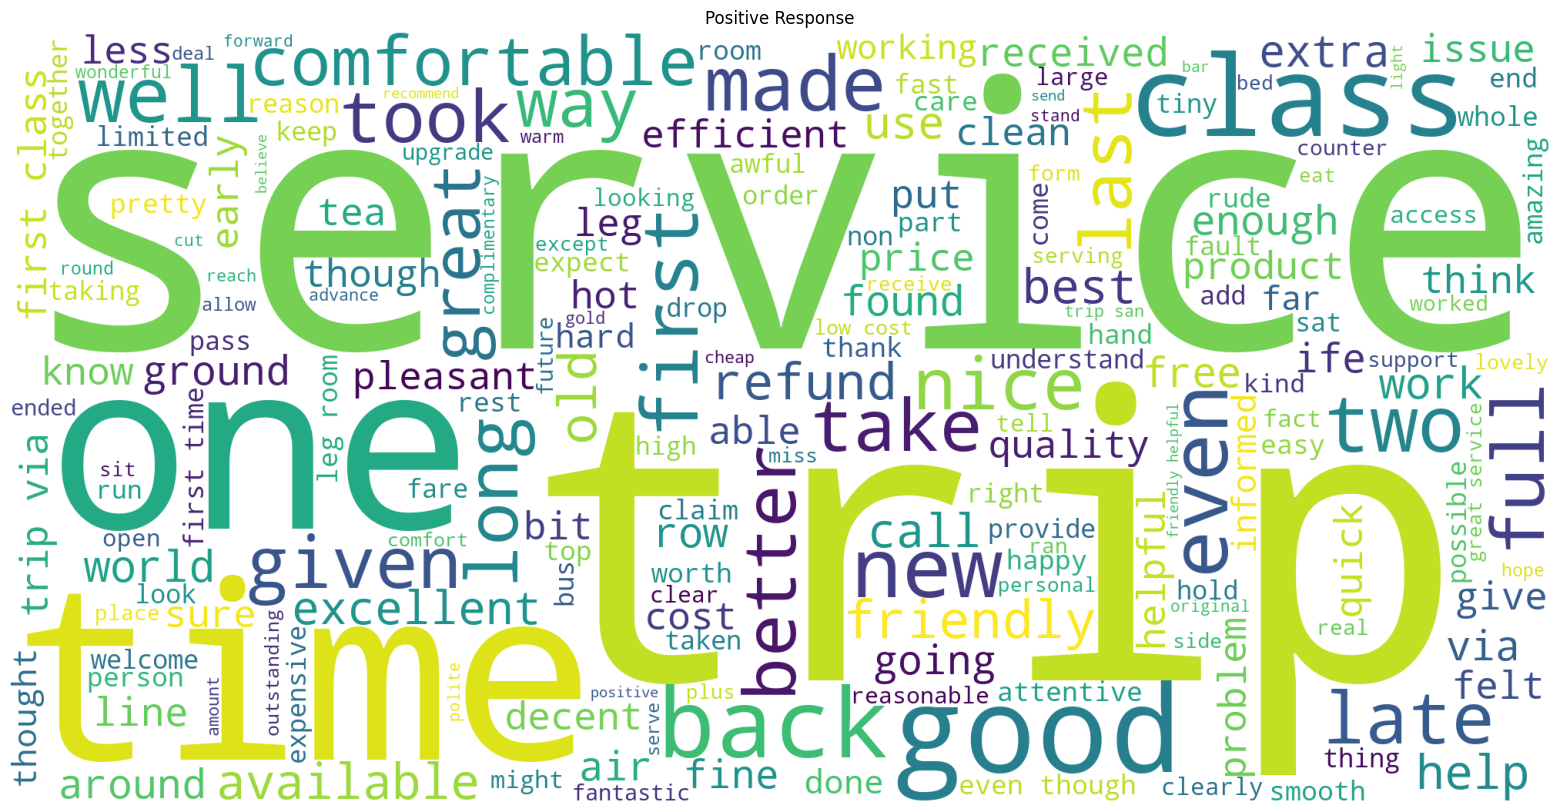

In [70]:
text = open('positiveList.txt', 'r')
data = text.read()
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(mode='RGB', background_color="white", width=2000, height=1000).generate(data)
plt.title('Positive Response')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Negative Response WordCloud
This word cloud represents the most negative occurring words in the overall response, with the size of each word indicating its frequency of occurrence.

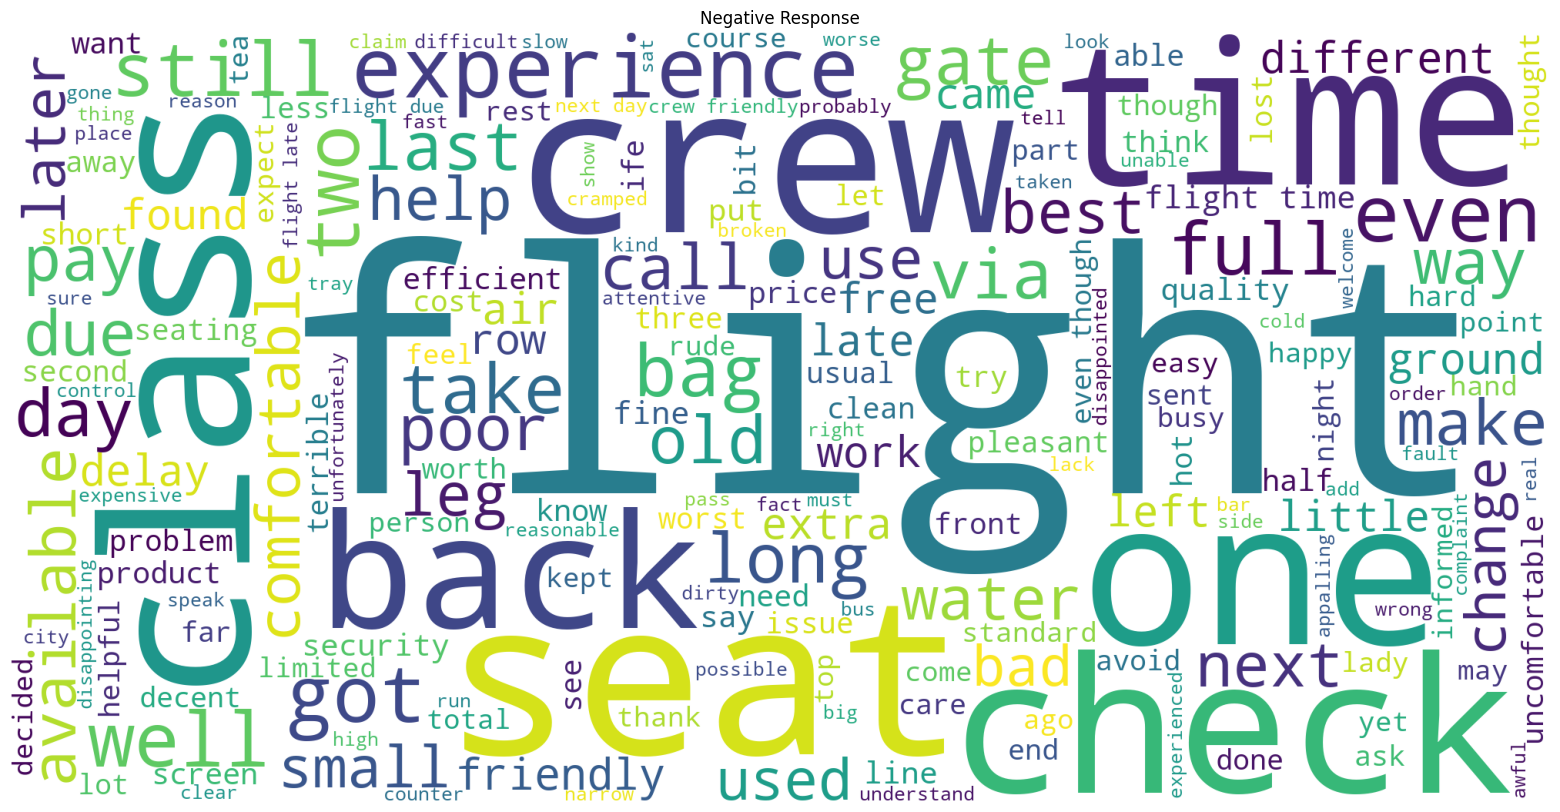

In [71]:
text = open('negativeList.txt', 'r')
data = text.read()
plt.figure(figsize=(20, 10))
wordcloud = WordCloud(mode='RGB', background_color="white", width=2000, height=1000).generate(data)
plt.title('Negative Response')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [55]:
import matplotlib.pyplot as plt
from matplotlib import style
from textblob import TextBlob
import numpy as np   

In [59]:
filepath = 'rawdata.txt'
with open(filepath, encoding='utf-8') as fp:
    line = fp.readline()
    cnt = 1
    fa = open('NewSentimentList.csv', 'w')
    fa.write('Polarity,Subjectivity,Count\n')

    while line:
        data = line.strip()
        analysis = TextBlob(data)
        countList = list(analysis.sentiment)

        vs = ','.join([str(i) for i in countList])
        fa.write(vs + "," + str(cnt) + '\n')
        line = fp.readline() 
        cnt = cnt + 1

## Visualization
The results are visualized using linegraph and scatter plot to present sentiment trends and patterns.

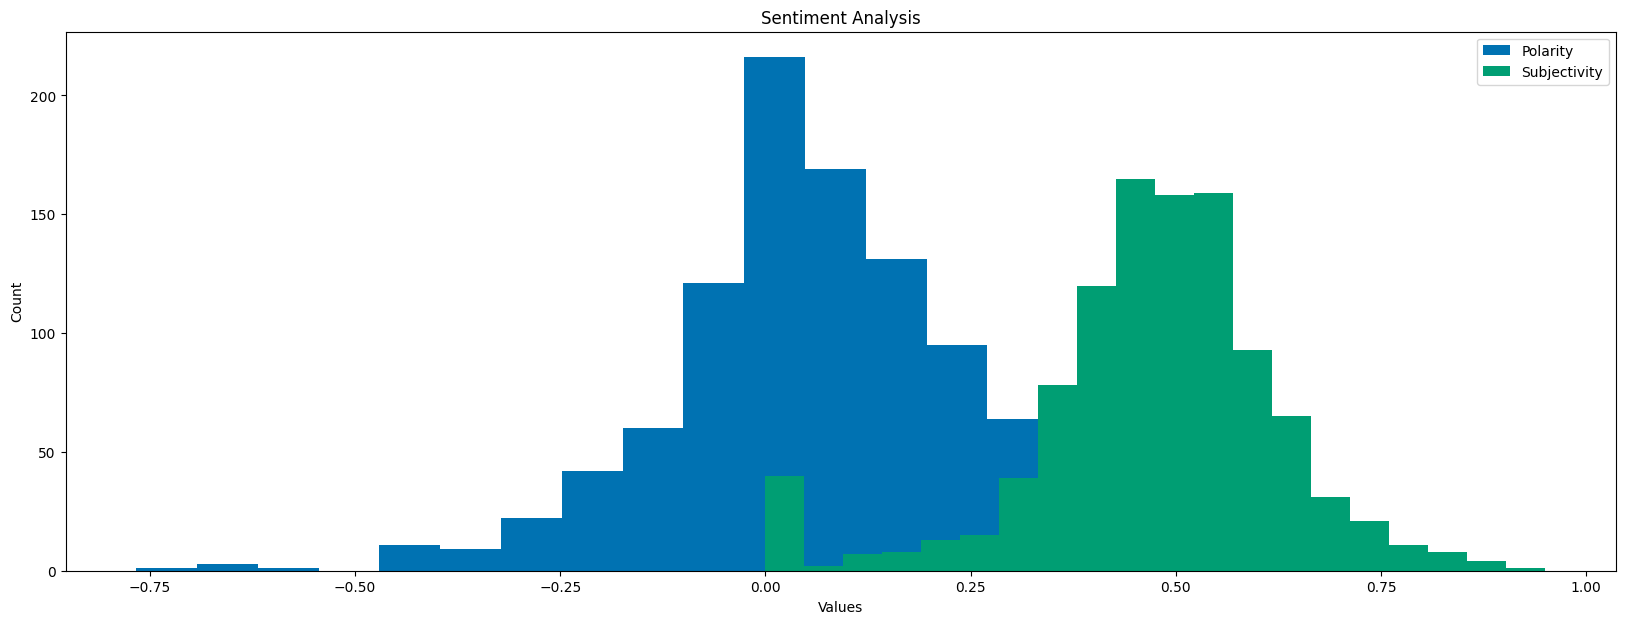

In [65]:
# create a histogram for the polarity and subjectivity
plt.figure(figsize=(20, 7))
plt.hist(df['Polarity'], bins=20, label='Polarity')
plt.hist(df['Subjectivity'], bins=20, label='Subjectivity')
plt.xlabel('Values')
plt.ylabel('Count')
plt.legend()
plt.title('Sentiment Analysis')
plt.show()


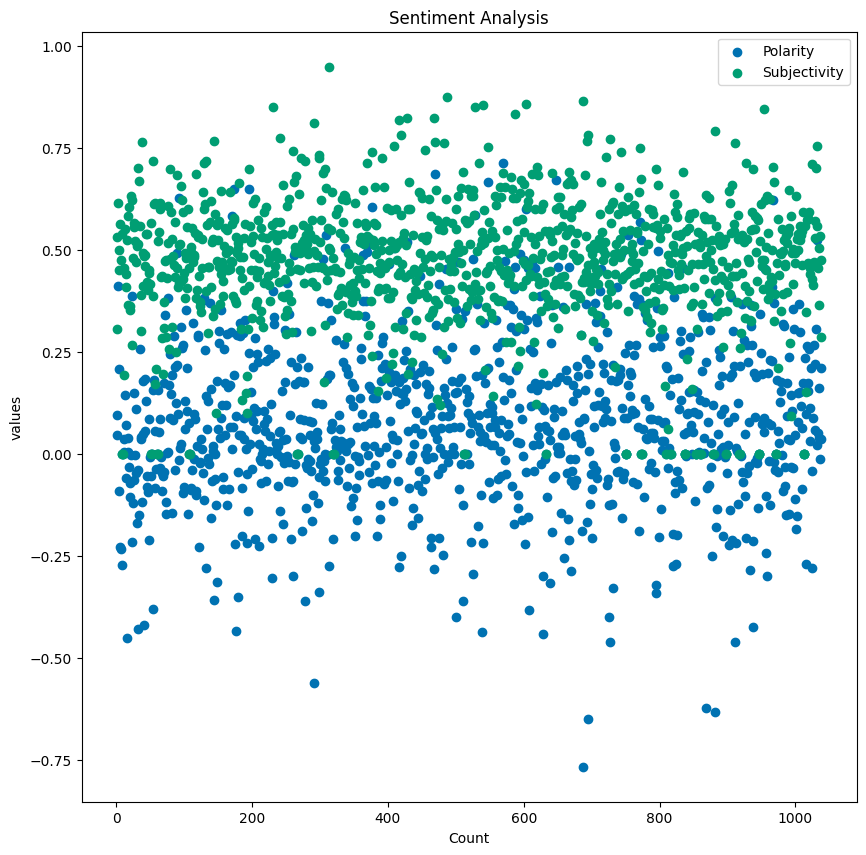

In [72]:
plt.figure(figsize=(10, 10))
df = pd.read_csv('NewSentimentList.csv')
plt.scatter(data=df, x='Count', y='Polarity')
plt.scatter(data=df, x='Count', y='Subjectivity')
plt.xlabel('Count')
plt.ylabel('values')
plt.legend()
plt.title('Sentiment Analysis')
plt.show()